# Fourier

Simple code to test Fourier Analysis/Lowpass. You can select a data range and the frequency to cut off. On the resulting data an inversed Fourier analysis is used to recreate sensor data.<br><br>
Bugs: Carefull, doesn't detect empty datasets (in the datasets, there's a gap when new file starts)! I think the data1.csv file is already filtered (the signal looks very nice), could it be that part of the recordings where removed (tried with different dataset, got more promissing results)?

### Parameters 

startAmount = Start Point of the Bytes from the measurement which should be read [int] <br>
endAmount = End Point of the Bytes from the measurement which should be read [int] <br>
sensor = Sensor Type which should be read [Str] <br>
       => gyroX, gyroY, gyroZ, lowAccelX, lowAccelY, lowAccelZ, highAccelX, highAccelY, highAccelZ <br>
min = smallest Frequency to filter (lower frequencies are removed) [float] <br>
max = highest Frequency to filter (higher frequencies are removed) [float] <br>

In [1]:
startAmount = 0                 # choose the amount of data to process
endAmount = 1350               # choose the amount of data to process
sensor = 'highAccelX'           # Sensor Type
min = 0.0                       # min frequency (everything below is removed)
max = 20.0                      # max frequency (everything above is removed)

Read the data (preconverted to the .csv format)

In [2]:
import pandas as pd
trackers=pd.read_csv('data1.csv')    # for txt file: delimiter=','

# used for txt file
# trackers.columns = ['Sensor', 
#                     'gyroX', 'gyroY', 'gyroZ',
#                     'lowAccelX', 'lowAccelY', 'lowAccelZ',
#                     'highAccelX', 'highAccelY', 'highAccelZ']

Show original Curve of the Sensor

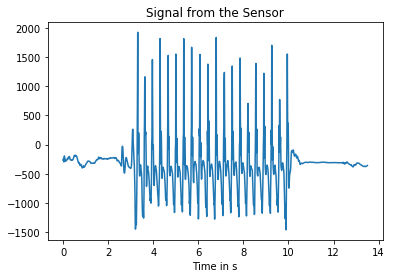

In [7]:
import matplotlib.pyplot as plt
import numpy as np

nor = trackers[startAmount:endAmount]             

# show the results
fig, ax = plt.subplots()
ax.plot(np.linspace(startAmount*0.01, endAmount*0.01,(endAmount-startAmount)), nor[sensor])
ax.set_title("Signal from the Sensor")
ax.set_xlabel("Time in s")
plt.show()

### Fourier analysis

Display the fourier Analysis for the read data

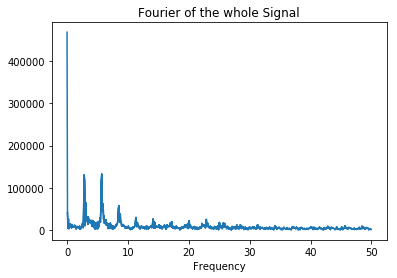

In [4]:
import scipy.fftpack

N = nor[sensor].size               # data size
T = 1.0 / 100.0                    # time per sampling, Interval (doesn't matter)
x = np.linspace(0.0, N*T, N)       # evenly spaced numbers from 0 to (dataSize * Interval)
y = nor[sensor].values             # all gyroX values from the tracker (amount defined at the top)

yf = scipy.fft(y)                  # create fourier analysis for the y-axis
xf = scipy.fftpack.fftfreq(N, T)   # create fourier analysis for the x-axis

# show the results
fig, ax = plt.subplots()
ax.plot(np.abs(xf), np.abs(yf))
ax.set_title("Fourier of the whole Signal")
ax.set_xlabel("Frequency")
plt.show()

Remove part of the frequencies in order to reduce noise

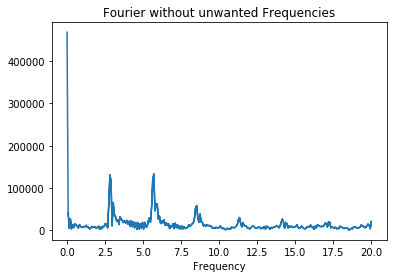

In [5]:
df = pd.DataFrame({'XF':xf,'YF':yf})                             # safe everything in pandas
df = df[((np.abs(df.XF)) <= max) & ((np.abs(df.XF)) >= min)]     # Remove unwanted frequencies

# show the results
fig, ax = plt.subplots()
ax.plot(np.abs(df.XF),np.abs(df.YF))
ax.set_title("Fourier without unwanted Frequencies")
ax.set_xlabel("Frequency")
plt.show()

Recalculate the original curve with the removed frequences

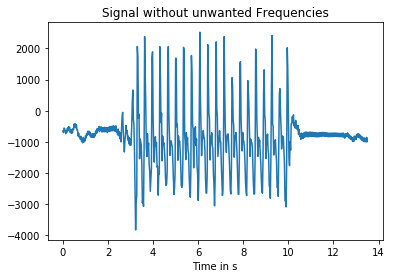

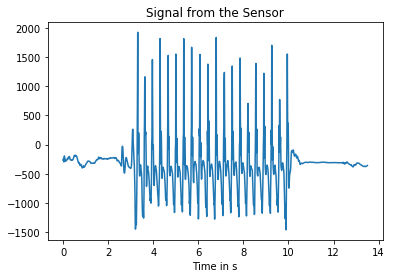

In [6]:
# inversed Fourier Transformation
yn = scipy.ifft(df.YF).real

# show the results of the filtered Signal
fig, ax = plt.subplots()
ax.plot(np.linspace(startAmount*0.01, endAmount*0.01, yn.size), yn)
ax.set_title("Signal without unwanted Frequencies")
ax.set_xlabel("Time in s")
plt.show()

# show the results of the unfiltered Signal
fig, ax = plt.subplots()
ax.plot(np.linspace(startAmount*0.01, endAmount*0.01,(endAmount-startAmount)), nor[sensor])
ax.set_title("Signal from the Sensor")
ax.set_xlabel("Time in s")
plt.show()